In [1]:
# Importing Important Libraries
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
data = pd.read_csv('healthcare_dataset.csv')
data.head()

,Name,Age,Gender,Blood Group Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,11/17/2022,Patrick Parker,Wallace-Hamilton,Medicare,37490.98336,146,Elective,12/1/2022,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,6/1/2023,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.06485,404,Emergency,6/15/2023,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,1/9/2019,Paul Baker,Walton LLC,Medicare,36874.89700,292,Emergency,2/8/2019,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,5/2/2020,Brian Chandler,Garcia Ltd,Medicare,23303.32209,480,Urgent,5/3/2020,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,7/9/2021,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.34418,477,Urgent,8/2/2021,Paracetamol,Normal


In [3]:
#Basic Checks
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Blood Group Type    10000 non-null  object 
 4   Medical Condition   10000 non-null  object 
 5   Date of Admission   10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Insurance Provider  10000 non-null  object 
 9   Billing Amount      10000 non-null  float64
 10  Room Number         10000 non-null  int64  
 11  Admission Type      10000 non-null  object 
 12  Discharge Date      10000 non-null  object 
 13  Medication          10000 non-null  object 
 14  Test Results        10000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.1+

In [4]:
data.describe(include="O")

,Name,Gender,Blood Group Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Admission Type,Discharge Date,Medication,Test Results
count,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
unique,9378,2,8,6,1815,9416,8639,5,3,1834,5,3
top,Michael Johnson,Female,AB-,Asthma,4/12/2019,Michael Johnson,Smith PLC,Cigna,Urgent,11/28/2021,Penicillin,Abnormal
freq,7,5075,1275,1708,15,7,19,2040,3391,14,2079,3456


In [5]:
data['Medical Condition'].unique()

array(['Diabetes', 'Asthma', 'Obesity', 'Arthritis', 'Hypertension',
       'Cancer'], dtype=object)

In [8]:
# Define a dictionary mapping numerical labels to medical condition names
medical_condition_map = {
    0: 'Arthritis', 1: 'Asthma', 2: 'Cancer', 3: 'Diabetes',4: 'Hypertension', 5: 'obesity'
}
result=medical_condition_map[2]
result

'Cancer'

In [9]:
# Group the data by blood group type, gender, and medical condition and count occurrences
grouped_data = data.groupby(['Blood Group Type', 'Gender', 'Medical Condition']).size().reset_index(name='count')

In [10]:
import warnings
warnings.filterwarnings('ignore')

Question 1: Create a plot to find out if there is any co-relation between the Blood Group Type, Gender and the Medical Condition?

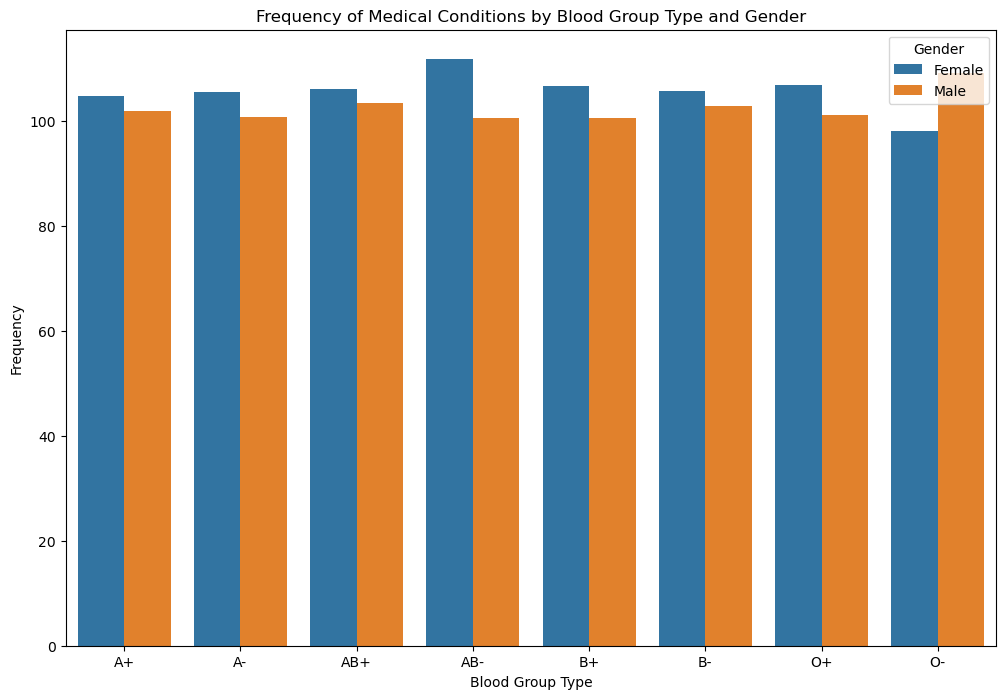

In [11]:
# Plot the grouped bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Blood Group Type', y='count', hue='Gender', data=grouped_data, ci=None)
plt.title('Frequency of Medical Conditions by Blood Group Type and Gender')
plt.xlabel('Blood Group Type')
plt.ylabel('Frequency')
plt.legend(title='Gender')
plt.show()

# Insights : Their is no corelation between those features

In [12]:
# Drop irrelevant columns and handle missing values
data = data.drop(columns=['Name', 'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider', 'Room Number', 'Discharge Date', 'Medication', 'Test Results'])

In [13]:
data.head()

,Age,Gender,Blood Group Type,Medical Condition,Billing Amount,Admission Type
0,81,Female,O-,Diabetes,37490.98336,Elective
1,35,Male,O+,Asthma,47304.06485,Emergency
2,61,Male,B-,Obesity,36874.89700,Emergency
3,49,Male,B-,Asthma,23303.32209,Urgent
4,51,Male,O-,Arthritis,18086.34418,Urgent


Question 2: Find out the Average Billing Amount required to treat each medical Condition?

In [14]:
# Group the data by medical condition and calculate the mean billing amount for each group
average_billing_amount = data.groupby('Medical Condition')['Billing Amount'].mean()

In [15]:
# Print or display the average billing amount for each medical condition
print("Average Billing Amount for Each Medical Condition:")
print(average_billing_amount)

Average Billing Amount for Each Medical Condition:
Medical Condition
Arthritis       25187.631255
Asthma          25416.869895
Cancer          25539.096133
Diabetes        26060.116129
Hypertension    25198.033973
Obesity         25720.842683
Name: Billing Amount, dtype: float64


In [16]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [17]:
# Apply label encoding to categorical columns
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['Blood Group Type'] = label_encoder.fit_transform(data['Blood Group Type'])
data['Medical Condition'] = label_encoder.fit_transform(data['Medical Condition'])
data['Admission Type'] = label_encoder.fit_transform(data['Admission Type'])

In [18]:
# Display the DataFrame with encoded columns
data.head()

,Age,Gender,Blood Group Type,Medical Condition,Billing Amount,Admission Type
0,81,0,7,3,37490.98336,0
1,35,1,6,1,47304.06485,1
2,61,1,5,5,36874.89700,1
3,49,1,5,1,23303.32209,2
4,51,1,7,0,18086.34418,2


In [19]:
data.corr()

,Age,Gender,Blood Group Type,Medical Condition,Billing Amount,Admission Type
Age,1.000000,-0.008099,-0.006807,-0.003616,-0.009483,0.003233
Gender,-0.008099,1.000000,0.012607,-0.003872,0.002340,-0.004515
Blood Group Type,-0.006807,0.012607,1.000000,-0.005318,-0.002524,-0.005247
Medical Condition,-0.003616,-0.003872,-0.005318,1.000000,0.008602,0.019222
Billing Amount,-0.009483,0.002340,-0.002524,0.008602,1.000000,0.002531
Admission Type,0.003233,-0.004515,-0.005247,0.019222,0.002531,1.000000


<Axes: >

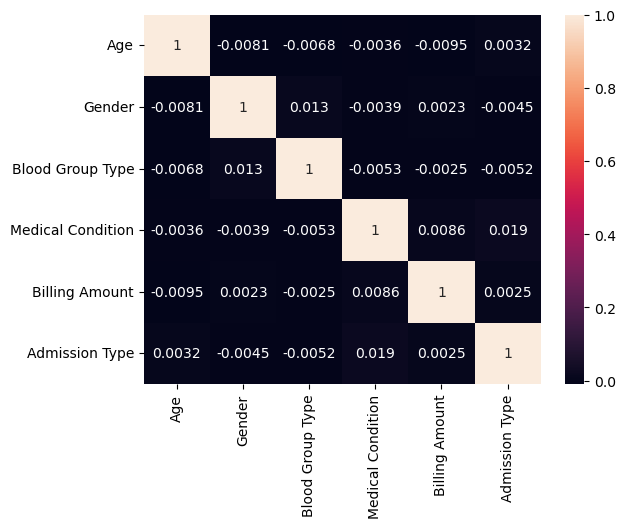

In [20]:
# Checking correlation between the features
sns.heatmap(data.corr(),annot=True)

In [21]:
X= data[['Gender','Blood Group Type']]
y= data['Medical Condition']

In [22]:
X

,Gender,Blood Group Type
0,0,7
1,1,6
2,1,5
3,1,5
4,1,7
...,...,...
9995,1,0
9996,0,2
9997,1,5
9998,1,0


In [23]:
y

0       3
1       1
2       5
3       1
4       0
       ..
9995    5
9996    0
9997    0
9998    0
9999    0
Name: Medical Condition, Length: 10000, dtype: int32

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=10)

In [25]:
X_train.shape

(8000, 2)

In [26]:
X_test.shape

(2000, 2)

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [28]:
model_RF=RandomForestClassifier(n_estimators=100, random_state=42)
model=model_RF.fit(X_train,y_train)

In [29]:
y_pred = model_RF.predict(X_test)

In [30]:
accuracy_RF=accuracy_score(y_test, y_pred)
print("Accuracy of Random Forest Model:",accuracy_RF)

Accuracy of Random Forest Model: 0.1695


In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
model_LR=LogisticRegression()
model_LR.fit(X_train, y_train)

LogisticRegression()

In [33]:
y_pred =model_LR.predict(X_test)

In [34]:
accuracy_LR=accuracy_score(y_test, y_pred)
print("Accuracy of Logistic Regression model:",accuracy_LR)

Accuracy of Logistic Regression model: 0.159


In [38]:
import pickle

# Save the model
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [39]:
pickle_model=pickle.load(open('model.pkl', 'rb'))

In [41]:
pickle_model.predict([[0,1]])

array([2])